# Εργασία 3 – Συνδυασμός Μοντέλων

Κωνσταντίνα Μαρίνα Μπλέτσα,    ΑΕΜ 243

# Εισαγωγή Βιβλιοθηκών

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Εισαγωγή Δεδομένων

In [28]:
import yfinance as yf

ticker_symbol = "DX-Y.NYB"
ticker = yf.Ticker(ticker_symbol)
df = ticker.history(period="5y").reset_index(drop=False)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,0,0.0,0.0
1,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,0,0.0,0.0
2,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000,0,0.0,0.0
3,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001,0,0.0,0.0
4,2020-11-12 00:00:00-05:00,93.010002,93.139999,92.779999,92.959999,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1252,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999,0,0.0,0.0
1253,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,0,0.0,0.0
1254,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003,0,0.0,0.0
1255,2025-11-04 00:00:00-05:00,99.980003,100.260002,99.739998,100.220001,0,0.0,0.0


# Αφαίρεση των στηλων 'Volume', 'Dividends'και 'Stock Splits'

In [29]:
df = df.drop(columns=['Volume', 'Dividends', 'Stock Splits'])

print(df)

                          Date        Open        High        Low       Close
0    2020-11-06 00:00:00-05:00   92.570000   92.820000  92.180000   92.230003
1    2020-11-09 00:00:00-05:00   92.239998   92.959999  92.129997   92.730003
2    2020-11-10 00:00:00-05:00   92.760002   92.970001  92.599998   92.750000
3    2020-11-11 00:00:00-05:00   92.699997   93.209999  92.610001   93.040001
4    2020-11-12 00:00:00-05:00   93.010002   93.139999  92.779999   92.959999
...                        ...         ...         ...        ...         ...
1252 2025-10-30 00:00:00-04:00   99.139999   99.720001  98.919998   99.529999
1253 2025-10-31 00:00:00-04:00   99.489998   99.839996  99.419998   99.800003
1254 2025-11-03 00:00:00-05:00   99.750000   99.989998  99.709999   99.870003
1255 2025-11-04 00:00:00-05:00   99.980003  100.260002  99.739998  100.220001
1256 2025-11-06 00:00:00-05:00  100.108002  100.108002  99.890999   99.890999

[1257 rows x 5 columns]


# Ερώτημα 1

Δημιουργία και Εμφάνιση του Line Plot

In [30]:

df_long = df.melt(
    id_vars='Date',
    value_vars=['Open', 'High', 'Low', 'Close'],
    var_name='Type',
    value_name='Price'
)

fig = px.line(
    df_long,
    x='Date',
    y='Price',
    color='Type',
    title=f'Τιμές Open, High, Low, Close (5 έτη)'
)

fig.update_layout(
    width=1000,
    height=600,
    xaxis_title='Ημερομηνία',
    yaxis_title='Τιμή'
)

fig.show()

# Ερώτημα 2

 Στατικές ή μη Στατικές Χρονοσειρές

Από το γράφημα των τιμών Open, High, Low και Close παρατηρείται ότι οι χρονοσειρές δεν παραμένουν γύρω από έναν σταθερό μέσο όρο, αλλά παρουσιάζουν μεταβολές στη διακύμανση μέσα στο χρονικό διάστημα των πέντε ετών. Συγκεκριμένα, υπάρχουν περίοδοι όπου οι τιμές αυξάνονται σταθερά, όπως το 2021–2022 και άλλες όπου μειώνονται,όπως το 2023–2024, γεγονός που δείχνει ότι η συμπεριφορά τους μεταβάλλεται με τον χρόνο. Συνεπώς, οι χρονοσειρές αυτές είναι μη στατικές, αφού δεν διατηρούν σταθερό μέσο όρο και διακύμανση στο χρόνο, αλλά επηρεάζονται από τάσεις και διακυμάνσεις της αγοράς.

# Ερώτημα 3

Εκπαίδευση ενός Regressor σε μη στατικές χρονοσειρές

Οι τιμές στις μη στατικές χρονοσειρές παρουσιάζουν τάσεις και μεταβαλλόμενη διακύμανση μέσα στα έτη, το μοντέλο συνεπώς μαθαίνει σχέσεις που ισχύουν μόνο για συγκεκριμένες χρονικές περιόδους αυτό σημαίνει ότι αν εκπαιδεύσουμε το Regressor με μη στατική χρονοσειρά μπορεί να κάνει overfit σε δεδομένα μιας συγκεκριμένης χρονικής περιόδου, και να αποτύχει να προβλέψει σωστά μελλοντικές τιμές όταν η τάση αλλάξει. Επιπλέον, οι στατιστικές ιδιότητες των δεδομένων (μέσος όρος, διακύμανση, συσχετίσεις) δεν παραμένουν σταθερές, άρα το μοντέλο δεν έχει μια σταθερή κατανομή πάνω στην οποία να μάθει αξιόπιστα. Έτσι, οι προβλέψεις του γίνονται ασταθείς και αναξιόπιστες και το μοντέλο χάνει τη γενίκευση του.

Ετσι και στην περίπτωση των δεδομένων του δείκτη DX-Y.NYB, όπου φαίνονται μεγάλες αυξομειώσεις ιδίως στις περίοδο 2021–2022, ένα Regressor που εκπαιδεύεται κατευθείαν πάνω σε αυτήν την μη στατική χρονοσειρά τιμών ειναι πιθανό να αποτύχει στην πρόβλεψη αφου η κατάσταση (pattern) της αγοράς αλλάζει με την πάροδο του χρόνου.

# Ερώτημα 4

Τάση του δολαρίου μεταξύ Ιούνιο και Ιούλιο του 2025


Στην περίοδο μεταξύ Ιουνίου και Ιουλίου του 2025 η τιμή του δολρίου, όπως φαίνεται από τον δείκτη DXY εμφάνισε σημαντική πτώση υποχορώντας από τον Ιούνιο μεχρι μέσα Ιολίου και μετά δείχνει μια σταθεροποίηση.

Οι λόγοι για την εξασθένηση του δολαρίου μπορεί να αποδοθεί σε πολλούς παράγοντες όπως
Πολιτική αβεβαιότητα στις ΗΠΑ: Η αλλαγή της κυβέρνησης στις Ηνωμένες Πολιτείες και η απρόβλεπτη οικονομική πολιτική της νέας διοίκησηςθεωρήθηκε ότι θα μπορούσε να βλάψει την αμερικανική οικονομία, οδηγώντας σε αποδυνάμωση του δολαρίου.
Πτώση του δολαρίου μετά από δασμούς: Τον Απρίλιο του 2025, μετά την ανακοίνωση δασμών, το δολάριο κατέρρευσε, καθώς το ευρώ θεωρήθηκε «μέτριο ασφαλές καταφύγιο» από τους επενδυτές.
Οικονομική ανθεκτικότητα της Ευρωζώνης: Οι προβλέψεις για επιτάχυνση της οικονομικής ανάπτυξης στην Ευρωζώνη και η σταθεροποίηση των συνθηκών συνέβαλαν στην ενίσχυση του ευρώ.
Μείωση επιτοκίων της Federal Reserve: Η προσδοκία για μείωση των επιτοκίων από την Federal Reserve των ΗΠΑ, σε συνδυασμό με τη σταθεροποίηση της ανάπτυξης στην Ευρωζώνη, έκανε το ευρώ πιο ελκυστικό για τους επενδυτές

# Ερώτημα 5


Είναι δυνατή η εύρεση συνάρτησης f(ot,ht,lt,ct)=ct+1?

Θεωρητικά, θα μπορούσε να οριστεί μια συνάρτηση που θα προβλέπει την τιμή κλεισίματος του δολαρίου για την επόμενη μέρα με βάση τα σημερινά δεδομένα open, high, low και close.

Αλλά στην πράξη μια τέτοια πρόβλεψη δεν θα ήταν αξιόπιστη αφού όπως είπαμε και πάνω η χρονοσειρά του δολαρίου είναι μη στατική, παρουσιάζει τάσεις και μεταβαλλόμενη διακύμανση, γεγονός που σημαίνει ότι οι σχέσεις μεταξύ των μεταβλητών αλλάζουν με τον χρόνο. Επιπλέον, η τιμή του επηρεάζεται πολύ από εξωτερικούς παράγοντες όπως αποφάσεις της Federal Reserve, οικονομικά δεδομένα ή γεωπολιτικές εξελίξεις, οι οποίοι δεν περιλαμβάνονται στις προβλέψεις του μοντέλου. Συνεπώς δεν μπορούμε να ορίσουμε μια συνάρτηση πρόβλεψης με αυτά τα δεδομένα η οποία θα είναι αξιόπιστη.

# Ερώτημα 6

Έχει νόημα να γίνει τυχαίος διαχωρισμός των δεδομένων σε train-test?


Δεν έχει νόημα να γίνει τυχαίος διαχωρισμός των δεδομένων μιας μη στατικής χρονοσειράς σε train-test set. Οι μη στατικές χρονοσειρές χαρακτηρίζονται από το γεγονός ότι οι στατιστικές τους ιδιότητες, όπως η μέση τιμή, η διασπορά και οι σχέσεις μεταξύ των τιμών, αλλάζουν με τον χρόνο. Αυτό σημαίνει ότι τα δεδομένα του παρελθόντος μπορεί να μην είναι αντιπροσωπευτικά των μελλοντικών δεδομένων.

Επίσης πολύ σημαντικό ειναι οτι ο τυχαίος διαχωρισμός χαλάει τη χρονική δομή της μη στατικής χρονοσειράς, πιο σωστή πρακτική είναι ο διαχωρισμός με βάση τον χρόνο τα πρώτα δεδομένα χρησιμοποιούνται για training και τα πιο πρόσφατα για testing αφού με αυτόν τον τρόπο διατηρείται η χρονική ροή των δεδομένων και γινεται πιο ευκολα η αξιολόγηση του μοντέλου για το πόσο καλα προβλέπει το μέλλον.

# Ερώτημα 7

Χωρισμός δεδομένων σε train-test dataframes


In [31]:
train_df = df[df['Date'].dt.year < 2024].copy()
test_df = df[df['Date'].dt.year == 2024].copy()

Αφαίρεση της στήλης Date από κάθε DataFrame

In [32]:
train_df = train_df.drop(columns=['Date'])
test_df = test_df.drop(columns=['Date'])

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (791, 4)
Test shape: (252, 4)


# Ερώτημα 8

Δημιουργία συναρτησης

In [34]:
def create_timeframes(df, N):
    X = []
    y = []
    for i in range(len(df) - N):
        X.append(df.iloc[i:i+N].values)
        y.append(df.iloc[i+N]["Close"])
    return np.array(X), np.array(y)

N = 3
X_train, y_train = create_timeframes(train_df, N)
X_test, y_test = create_timeframes(test_df, N)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

Train shapes: (788, 3, 4) (788,)
Test shapes: (249, 3, 4) (249,)


# Ερώτημα 9

Πρόβλεψη κοντινού ή μακρινου μέλλοντος

Αν θέλουμε να προβλέψουμε την επόμενη ημέρα, το μέγεθος του timeframe Ν είναι μικρό από 3 έως 10 ημέρες, αυτός ο αριθμός προηγούμενων ημερών είναι αρκετός για να αποτυπώσει την τωρινή κατάσταση και τις τάσεις της αγοράς, που επηρεάζουν την τιμή της επόμενης ημέρας. Αν χρησιμοποιηθεί πολύ μεγάλο Ν, το μοντέλο μπορεί να δώσει βαρύτητα σε παλιές τιμές που δεν είναι πλέον σχετικές για το άμεσο μέλλον.

Αντίθετα, αν θέλουμε να προβλέψουμε έναν πιο μακρινό χρονικό ορίζοντα, ένα μήνα μπροστά, είναι προτιμότερο να επιλέξουμε ένα μεγαλύτερο μέγεθος παραθύρου Ν, δηλαδή ένα πιο μεγάλο ιστορικό σύνολο δεδομένων. Στις μακροπρόθεσμες προβλέψεις, το μοντέλο χρειάζεται να δει ευρύτερα μοτίβα, εποχικότητα ή μακροχρόνιες τάσεις που επηρεάζουν την πορεία της χρονοσειράς. Ένα μεγαλύτερο Ν, για παράδειγμα μεταξύ 30 και 60 ημερών, προσφέρει στο μοντέλο επαρκή πληροφορία ώστε να αναγνωρίσει κύκλους ή επαναλαμβανόμενες συμπεριφορές που σχετίζονται με τη μελλοντική τιμή.

# Ερώτημα 10

Δημιουργία των x_train, y_train, x_test, y_test και Μετατροπή σε διανύσματα Nx4 = 20

In [35]:
np.set_printoptions(formatter={'float': '{:0.2f}'.format})
N = 5

X_train, y_train = create_timeframes(train_df, N)
X_test, y_test = create_timeframes(test_df, N)

X_train = X_train.reshape(X_train.shape[0], N * 4)
X_test = X_test.reshape(X_test.shape[0], N * 4)

print("Train shapes:", X_train.shape, y_train.shape)
print("Test shapes:", X_test.shape, y_test.shape)

print("\n1ο input του X_train:\n", X_train[0])

Train shapes: (786, 20) (786,)
Test shapes: (247, 20) (247,)

1ο input του X_train:
 [92.57 92.82 92.18 92.23 92.24 92.96 92.13 92.73 92.76 92.97 92.60 92.75
 92.70 93.21 92.61 93.04 93.01 93.14 92.78 92.96]


# Ερώτημα 11

Δημιουργία των Μοντέλων

α) LinearRegression

In [42]:
train_errors = []
test_errors = []

linearR = LinearRegression()
linearR.fit(X_train, y_train)

y_pred_train_lin = linearR.predict(X_train)
y_pred_test_lin  = linearR.predict(X_test)

mae_train_linearR = mean_absolute_error(y_train, y_pred_train_lin)
mae_test_linearR  = mean_absolute_error(y_test,  y_pred_test_lin)

train_errors.append(mae_train_linearR)
test_errors.append(mae_test_linearR)

print(f"Linear Regression — MAE train: {mae_train_linearR:.4f} | MAE test: {mae_test_linearR:.4f}")

Linear Regression — MAE train: 0.3458 | MAE test: 0.2846


b) RandomForest

In [43]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf  = rf.predict(X_test)

mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
mae_test_rf  = mean_absolute_error(y_test,  y_pred_test_rf)

train_errors.append(mae_train_rf)
test_errors.append(mae_test_rf)

print(f"Random Forest — MAE train: {mae_train_rf:.4f} | MAE test: {mae_test_rf:.4f}")

Random Forest — MAE train: 0.1454 | MAE test: 0.3209


c) Bagging(LR)

In [44]:
bag_linearR = BaggingRegressor(
    estimator=LinearRegression(),
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)
bag_linearR.fit(X_train, y_train)

y_pred_train_bag = bag_linearR.predict(X_train)
y_pred_test_bag  = bag_linearR.predict(X_test)

mae_train_bag = mean_absolute_error(y_train, y_pred_train_bag)
mae_test_bag  = mean_absolute_error(y_test,  y_pred_test_bag)

train_errors.append(mae_train_bag)
test_errors.append(mae_test_bag)

print(f"Bagging(LinearRegression) — MAE train: {mae_train_bag:.4f} | MAE test: {mae_test_bag:.4f}")


Bagging(LinearRegression) — MAE train: 0.3459 | MAE test: 0.2850


d) BLR (Bayesian Ridge)

In [45]:
blr = BayesianRidge()
blr.fit(X_train, y_train)

y_pred_train_blr = blr.predict(X_train)
y_pred_test_blr  = blr.predict(X_test)

mae_train_blr = mean_absolute_error(y_train, y_pred_train_blr)
mae_test_blr  = mean_absolute_error(y_test,  y_pred_test_blr)

train_errors.append(mae_train_blr)
test_errors.append(mae_test_blr)

print(f"BLR — MAE train: {mae_train_blr:.4f} | MAE test: {mae_test_blr:.4f}")

BLR — MAE train: 0.3457 | MAE test: 0.2849


e) Stacking

In [47]:
estimators = [
    ("LinearR", LinearRegression()),
    ("DecisionT", DecisionTreeRegressor(random_state=42, max_depth=8))
]

stack = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(),
)
stack.fit(X_train, y_train)

y_pred_train_stack = stack.predict(X_train)
y_pred_test_stack  = stack.predict(X_test)

mae_train_stack = mean_absolute_error(y_train, y_pred_train_stack)
mae_test_stack  = mean_absolute_error(y_test,  y_pred_test_stack)

train_errors.append(mae_train_stack)
test_errors.append(mae_test_stack)

print(f"Stacking — MAE train: {mae_train_stack:.4f} | MAE test: {mae_test_stack:.4f}")

Stacking — MAE train: 0.3492 | MAE test: 0.2858


In [50]:

last_value = train_errors.pop()
last_value = test_errors.pop()
print("Train MAE:", train_errors)
print("Test  MAE:", test_errors)

Train MAE: [0.34575245774919117, 0.14543928232104048, 0.34590687653206387, 0.34566703455412157, 0.34921798140043797]
Test  MAE: [0.2845598676837101, 0.3208706623854745, 0.28499225276034595, 0.28490353663629037, 0.2858229510317477]


Bar plot για τα MAE

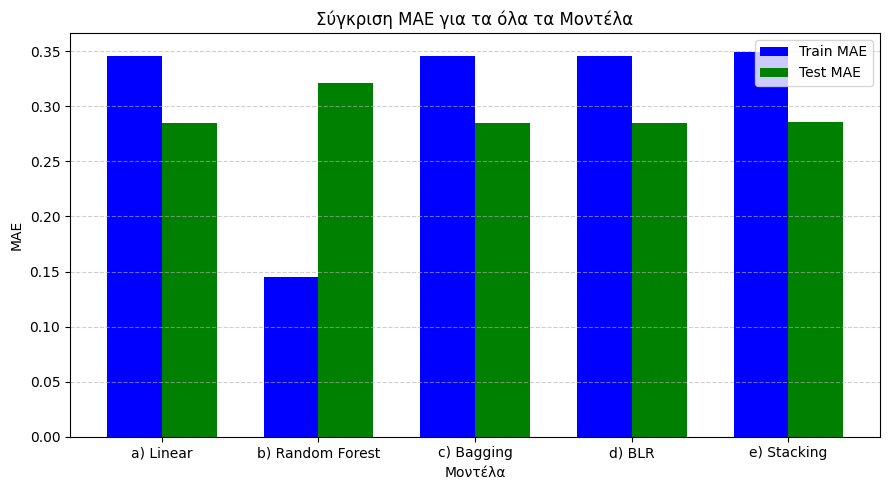

In [54]:
models = ['a) Linear', 'b) Random Forest', 'c) Bagging', 'd) BLR', 'e) Stacking']
x = np.arange(len(models))
width = 0.35
plt.figure(figsize=(9,5))
plt.bar(x - width/2, train_errors, width, label='Train MAE', color='blue')
plt.bar(x + width/2, test_errors, width, label='Test MAE', color='green')
plt.xlabel('Μοντέλα')
plt.ylabel('MAE')
plt.title('Σύγκριση MAE για τα όλα τα Μοντέλα')
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Εκτύπωση των τιμών MAE

Και τα πεντε μοντέλα προβλέπουν την τιμή του δολαρίου, το Linear Regression αναζητά μια απλή γραμμική σχέση μεταξύ των μεταβλητών, το Random Forest χρησιμοποιεί πολλά δέντρα απόφασης και τα συνδυάζει για να πετύχει καλύτερες προβλέψεις, το Bagging με Linear Regression εκπαιδεύει πολλά γραμμικά μοντέλα σε διαφορετικά υποσύνολα δεδομένων και υπολογίζει τον μέσο όρο των προβλέψεών τους, το Bayesian Ridge εφαρμόζει γραμμική παλινδρόμηση με στατιστική κανονικοποίηση για να περιορίσει την υπερπροσαρμογή, ενώ το Stacking Regressor συνδυάζει διαφορετικά μοντέλα όπως Linear και Decision Tree για να συνδυάσει τα πλεονεκτήματα του καθενός και πετύχει καλύτερη πρόβλεψη.